In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

https://www.programcreek.com/python/example/86074/sklearn.ensemble.RandomForestRegressor

In [206]:
df = pd.read_csv('./data/final_0507.csv')

In [207]:
cols = list(df.columns)
cols.remove('Date')

In [208]:
df[cols] = df[cols].astype(int)

In [209]:
df.drop('Unnamed: 0', axis=1, inplace=True)

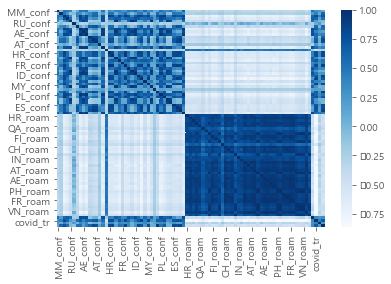

In [210]:
sns.heatmap(df.corr(), cmap='Blues')

In [211]:
df.Date = pd.to_datetime(df.Date)
df['dayofweek'] = df['Date'].dt.dayofweek
df.set_index('Date', inplace=True)

In [212]:
plt.style.use('ggplot')

In [213]:
#df.plot(subplots=True, figsize=(10,20))

## lag 변수 생성

In [214]:
lag_amount = 2

for i in range(lag_amount):
    df['lag{}'.format(i+1)] = df['target'].shift(i+1)
    
df.dropna(inplace=True)

# X_변수 재정의

In [249]:
new_importance['Feature'].values

array(['NZ_conf', 'lag1', 'DE_conf', 'CZ_conf', 'TH_conf', 'covid_tr',
       'HR_conf', 'lag2', 'MY_conf', 'ES_conf', 'IL_conf', 'CN_conf'],
      dtype=object)

In [251]:
new_x_cols = list(new_importance['Feature'].values);
new_x_cols

['NZ_conf',
 'lag1',
 'DE_conf',
 'CZ_conf',
 'TH_conf',
 'covid_tr',
 'HR_conf',
 'lag2',
 'MY_conf',
 'ES_conf',
 'IL_conf',
 'CN_conf']

In [215]:
X_cols = list(df.columns)

In [216]:
X_cols.__len__()

86

In [267]:
test_data_size = 14
# X변수들과 y변수 구분
X = df[new_x_cols]
y = df['target']

In [268]:
# Train, Test set split
X_train, X_test = X[:-test_data_size], X[-test_data_size:]
y_train, y_test = y[:-test_data_size], y[-test_data_size:]

### 2-1. 모델생성

#### 2-1-1) 기본 옵션으로 모델 생성

In [269]:
rf_uncustomized = RandomForestRegressor()
rf_uncustomized.fit(X_train, y_train)
# Train 데이터 설명력
print("Score on training set : {:.3f}".format(rf_uncustomized.score(X_train,y_train)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(X_test,y_test)))

Score on training set : 0.976
Score on test set : -0.983


#### 2-1-2) 현재 생성된 트리 모델의 옵션 확인

In [220]:
rf_uncustomized

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 2-2. 모델 Parameter 조정

#### 2-2-1) n_estimator : 트리 수 변경에 따른 모델 성능

In [221]:
train_score = []; test_score = []

para_n_tree = [n_tree * 10 for n_tree in range(1,40)]

for v_n_estimators in para_n_tree :
    rf = RandomForestRegressor(n_estimators= v_n_estimators)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test,y_test))

# 결과 저장

df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n['Gap'] = df_score_n['TrainScore'] - df_score_n['TestScore']

In [224]:
# 모델 설명력 확인
df_score_n.round(3).sort_values(by='Gap').head()

,n_estimators,TrainScore,TestScore,Gap
13,140,0.996,0.909,0.086
10,110,0.996,0.903,0.092
2,30,0.994,0.898,0.096
12,130,0.996,0.897,0.099
25,260,0.996,0.890,0.106


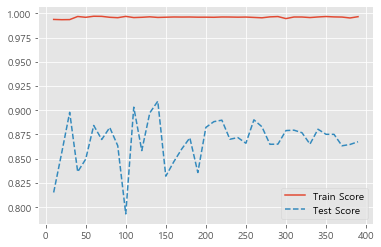

In [225]:
# 모델 설명력 그래프 확인

plt.plot(para_n_tree, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_n_tree, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

#### 2-2-2) min_samples_leaf : 잎사귀 노드의 최소 자료 수 변경에 따른 모델 성능

In [226]:
train_score = []; test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestRegressor(n_estimators=140,
                                min_samples_leaf = v_min_samples_leaf)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test,y_test))
    
# 결과 저장

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf['Gap'] = df_score_leaf['TrainScore'] - df_score_leaf['TestScore']

In [228]:
# 모델 설명력 확인
df_score_leaf.round(3).sort_values(by='Gap').head()

,MinSamplesLeaf,TrainScore,TestScore,Gap
3,4,0.986,0.916,0.070
17,18,0.777,0.703,0.075
2,3,0.992,0.901,0.091
0,1,0.996,0.902,0.093
1,2,0.993,0.882,0.111


> leaf는 9개로한다.

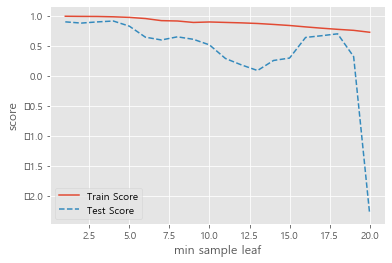

In [229]:
# 모델 설명력 그래프 확인

plt.plot(para_leaf, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'Test Score')
plt.ylabel('score'); plt.xlabel("min sample leaf")
plt.legend()

#### 2-2-3) min_samples_split : 분리노드의 최소 자료 수 변경에 따른 모델 성능

In [230]:
train_score = []; test_score = []

para_split = [n_split * 2 for n_split in range(2,41)]

for v_min_samples_split in para_split :
    rf = RandomForestRegressor(n_estimators=140,
                                 min_samples_leaf = 4,
                                min_samples_split = v_min_samples_split)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))
    
# 결과 저장

df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split['Gap'] = df_score_split['TrainScore'] - df_score_split['TestScore']

In [231]:
# 모델 설명력 확인
df_score_split.round(3).sort_values(by='Gap').head()

,MinSamplesSplit,TrainScore,TestScore,Gap
1,6,0.989,0.916,0.073
0,4,0.988,0.913,0.075
2,8,0.988,0.888,0.100
3,10,0.978,0.839,0.139
9,22,0.897,0.717,0.180


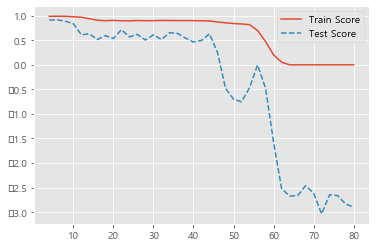

In [232]:
# 모델 설명력 그래프 확인

plt.plot(para_split, train_score, linestyle = "-", label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

# GridSearch

In [233]:
param_grid = { 
    'n_estimators': [30, 110, 140],
    'min_samples_leaf' : [4, 18, 3],
    'min_samples_split' : [8, 4, 6],
}

In [234]:
# grid search
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [235]:
CV_rfc

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=4,
                                             min_samples_split=80,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=140, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [236]:
CV_rfc.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=4,
                                             min_samples_split=80,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=140, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [237]:
CV_rfc.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 140}

## Feature Selection 1

In [240]:
X_cols = list(df.columns)
X_cols.remove('target')

In [241]:
test_data_size = 14
# X변수들과 y변수 구분
X = df[X_cols]
y = df['target']


In [242]:
# Train, Test set split
X_train, X_test = X[:-test_data_size], X[-test_data_size:]
y_train, y_test = y[:-test_data_size], y[-test_data_size:]

In [243]:
# parameter 설정
rf = RandomForestRegressor(n_estimators=140, min_samples_leaf=3, min_samples_split=8, max_features='auto')
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [244]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = list(X.columns)
df_importance['Importance'] = rf.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3).head(20)

,Feature,Importance
31,NZ_conf,0.384
83,lag1,0.112
21,DE_conf,0.097
17,CZ_conf,0.060
38,TH_conf,0.047
80,covid_tr,0.046
16,HR_conf,0.043
84,lag2,0.030
28,MY_conf,0.029
36,ES_conf,0.022


In [246]:
new_importance = df_importance[df_importance['Importance'] > 0.01]

In [865]:
#df_importance.to_csv('feature_importance.csv')

Text(0, 0.5, '변수')

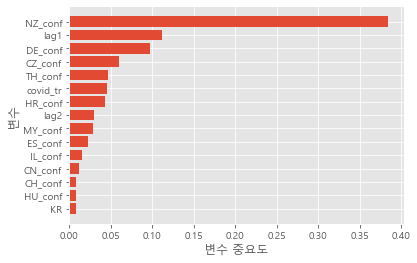

In [247]:
# 설명변수 중요도 그래
# 중요도가 높은 변수를 상위에 그림
# 상위 10개 확인
df_importance1 = df_importance.head(15)
df_importance1.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance1))
plt.barh(y = coordinates,
        width = df_importance1['Importance'])
plt.yticks(coordinates, df_importance1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# Feature Selection 2

# Prediction

In [270]:
new_x_cols = list(new_importance['Feature'])

In [291]:
X_cols = list(df.columns)
X_cols.remove('target')


# 테스트 데이터 수
test_data_size = 14
# X변수들과 y변수 구분

# # 앞의 40개는 지우기
# X = df[40:][new_x_cols]
# y = df[40:]['target']

X = df[X_cols]
y = df['target']

In [292]:
# Train, Test set split
X_train, X_test = X[:-test_data_size], X[-test_data_size:]
y_train, y_test = y[:-test_data_size], y[-test_data_size:]

In [293]:
X_train.shape

(89, 85)

In [294]:
from sklearn.ensemble.forest import RandomForestRegressor

In [295]:
param_grid = { 
    'n_estimators': [110, 130, 370],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [17, 4, 2],
    'min_samples_split' : [8, 4, 6],
}

In [296]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=140, min_samples_leaf=3, min_samples_split=8, max_features='auto')

# let's get the labels and features in order to run our 
# model fitting
labels = y_train
features = X_train

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

In [297]:
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predict'})
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predict'})

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [298]:
rgr.predict(X_test)

array([10.79904332, 11.47082287,  9.28784953,  8.36324814,  7.95355922,
        7.36772924,  7.19696754,  7.95055314,  7.88934952,  7.8161994 ,
        7.53354273,  8.03990559,  7.68882938,  7.28933919])

In [299]:
RF_predict.set_index(pd.to_datetime(df.index, format='%Y%m%d'), inplace=True)

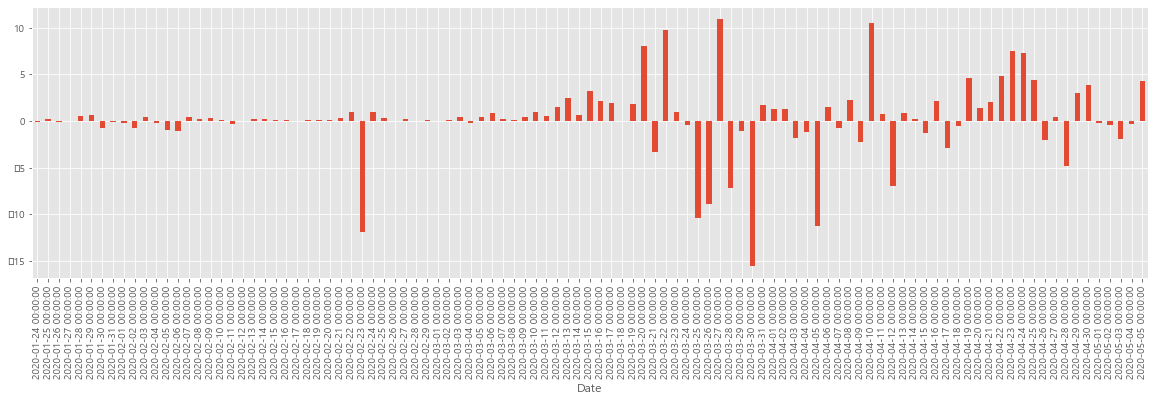

In [300]:
plt.figure(figsize=(20,5))
RF_predict['diff']=RF_predict.predict - df.target
RF_predict['diff'].plot(kind='bar')

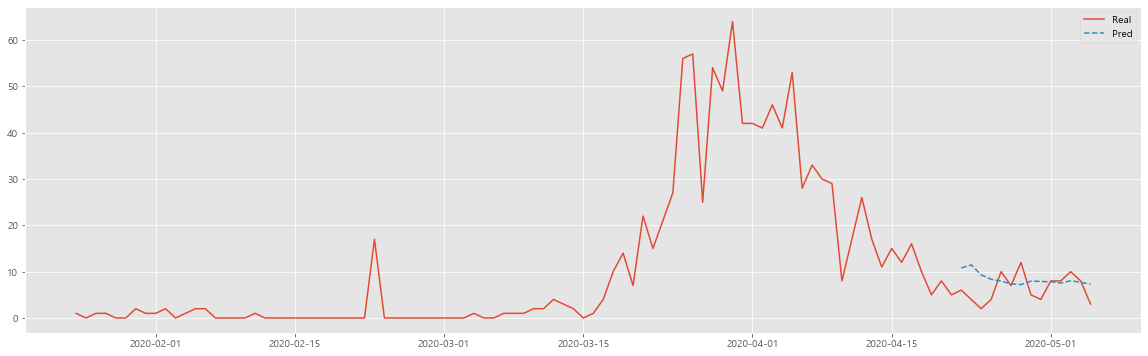

In [301]:
plt.figure(figsize=(20,6))
plt.plot(df['target'], label='Real')
plt.plot(RF_predict['predict'][-len(X_test):], '--',label='Pred', )
plt.legend()

In [302]:
rgr.predict(X_test)

array([10.79904332, 11.47082287,  9.28784953,  8.36324814,  7.95355922,
        7.36772924,  7.19696754,  7.95055314,  7.88934952,  7.8161994 ,
        7.53354273,  8.03990559,  7.68882938,  7.28933919])

In [303]:
from sklearn.metrics import r2_score
RSquared = r2_score(y_train, X_train_predict.values)

In [304]:
RSquared

0.9481791423919953

In [305]:
rgr.predict(X_test)

array([10.79904332, 11.47082287,  9.28784953,  8.36324814,  7.95355922,
        7.36772924,  7.19696754,  7.95055314,  7.88934952,  7.8161994 ,
        7.53354273,  8.03990559,  7.68882938,  7.28933919])

In [306]:
preds = pd.DataFrame({'real':y_test,'pred':rgr.predict(X_test)})

In [307]:
preds['gap'] = preds.real - preds.pred

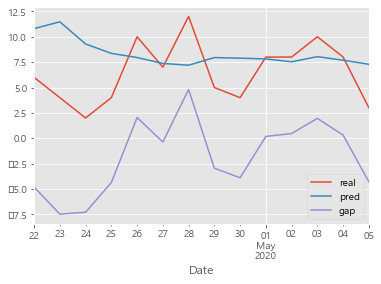

In [308]:
preds.plot()

In [309]:
from sklearn.metrics import mean_squared_error
# validation score
MSE = mean_squared_error(y_test, rgr.predict(X_test))
RMSE = np.sqrt(MSE)
score = 100*(1-(((rgr.predict(X_test) - y_test)**2).sum())/(rgr.predict(X_test)**2).sum())

In [310]:
print("MSE : {0}, RMSE : {1}, SCORE : {2}".format(MSE, RMSE, score))

MSE : 16.05773988172143, RMSE : 4.007210985426327, SCORE : 77.38207869972088
